In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
acid_stability =     pickle.load(open("acid_stability_include_unstable.p", "rb")) # <--- pretty sure this is dust
hull_stability =     pickle.load(open("hull_stability_include_unstable.p", "rb")) # <--- pretty sure this is dust


In [3]:
p_stabilisers = ['Li', 'Na', 'K', 'Rb', 'Cs', 'Mg', 'Y', 'Sc', 'Ba', 'Zn', 'Ca',
                 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Tb', 'Er', 'Tm', 'Yb']
potential_hosts = ['Ir', 'Pb', 'Pd', 'Pt', 'Rh',
                  'Ru', 'Sb', 'Si', 'Sn', 'Ta', 'Te', 'Ti', 'Tl', 'W']
actives = ["Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Nb", "Mo"]

half_conc = defaultdict(list)
low_conc = defaultdict(list)

for val in actives+p_stabilisers+potential_hosts:

    for key in hull_stability:
        if val in key:
            if key.index(val)==0:
                # then this is the 'housing' element, and its concentration begins from 0 to 1 across the list
                val_at_low_conc = hull_stability[key][18]
                low_conc[val].append(val_at_low_conc)
            else:
                val_at_low_conc = hull_stability[key][1]
                low_conc[val].append(val_at_low_conc)
                
            val_at_half_conc = hull_stability[key][9]
            half_conc[val].append(val_at_half_conc)
            


In [4]:
mean2avg = {}
for key in half_conc:
    mean2avg[key] = np.mean(half_conc[key])
    
df = pd.DataFrame.from_dict([mean2avg]).T
df.to_csv (r'hull_stability_50pc.csv', index=True, header=False)


In [5]:
ele2col = {
    "Ti": "#808080",
    "V": "#ffcccb",
    "Cr": "k",
    "Mn": "#9b870c",
    "Fe": "r",
    "Co": "b",
    "Cu": "#FFFF00",
    "Nb": "cyan",
    "Mo": "#FFA500",
    "Sn": "k",
    "W": "fuchsia",
    "Ge": "g",
    "Rh": "#FFA500",
    "Sb": "#66ff00",
    "Te": "y",
    "Ir": "b",
    "Ni": "#66FF00",
    "Bi": "b",
    'Sr': '#A020F0',
    'Ru': 'purple',
    'Ta': '#8b0000',
    'In': '#a9a9a9',
    'Pt': 'gray',
    'Pd': 'orange',
    'Re': 'purple',
    'Os': 'brown',
    'Tc': 'indigo',
    'Pb': '#4169e1',
    'Rh': 'cyan',
    'Li': 'cyan',
    'Mg': 'orange',
    'K': 'purple',
    'Na': 'g',
    "La": "#808080",
    "Ce": "#ffcccb",
    "Pr": "k",
    "Nd": "fuchsia",
    "Pm": "r",
    "Sm": "b",
    "Eu": "#FFFF00",
    "Gd": "cyan",
    "Tb": "#FFA500",
    "Dy": "k",
    "Ho": "fuchsia",
    "Er": "r",
    "Tm": "cyan",
#    "Yb": "#66ff00",
    "Ca": "lime",
    "Lu": "y",
    'Zn': 'gray',
    'Cs': 'r',
    "Ba": 'fuchsia',
    "Rb": "y",
    "Y": 'b',
    'Sc': 'k',
    
} 

In [6]:
potential_hosts = ['Ir', 'Pb', 'Pd', 'Pt', 'Rh',
                  'Ru', 'Sb', 'Si', 'Sn', 'Ta', 'Te', 'Ti', 'Tl', 'W']
actives = ["Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Nb", "Mo"]
half_conc_acid = defaultdict(list)
arr_conc_acid = defaultdict(list)

desired_conc = 0.5

for val in actives+p_stabilisers+potential_hosts:
    for key in acid_stability:
        if val in key:
            #print(key)
            # pbx energy at 1.5 V
            val_at_half_conc = acid_stability[key][0]['0.5'][0][5]
            #print(acid_stability[key][0]['0.5'][0])
            half_conc_acid[val].append(val_at_half_conc)
            if val in potential_hosts:
                arr_conc_acid[val].append(acid_stability[key][0][str(round(1-desired_conc, 2))][0])
            else:
                arr_conc_acid[val].append(acid_stability[key][0][str(desired_conc)][0])


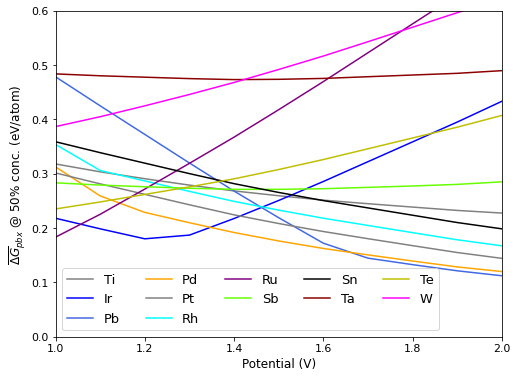

In [7]:
p_active = ['Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'W', 'Nb', 'Mo',]
lanthanides = ['La', 'Ce', 'Nd', 'Er', 'Pm', 'Eu', 'Sm','Pr', 'Tb', 'Tm', 'Yb']
alkali_or_earth = ['Li', 'K', 'Na', 'Mg', 'Ca', 'Sc', 'Y', 'Rb', 'Ba', 'Cs', ]
potential_hosts = ['Ir', 'Pb', 'Pd', 'Pt', 'Rh',
                  'Ru', 'Sb', 'Si', 'Sn', 'Ta', 'Te', 'Ti', 'Tl', 'W']
plt.figure(figsize=(8, 6))
for element in arr_conc_acid:
    if element not in potential_hosts or element not in ele2col.keys():
        continue

    plt.plot(np.linspace(1, 2, 11), np.mean(np.array(arr_conc_acid[element]), axis=0), label=element, color=ele2col[element])
    plt.xlabel("Potential (V)", fontsize=12)
    plt.ylabel("$\overline{\Delta G}_{pbx}$ @ 50% conc. (eV/atom)", fontsize=12)
    plt.legend(fontsize=13,ncol=5,loc='best')
plt.ylim(0, 0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlim(1,2)
plt.savefig("templates_50pc_acid.pdf")

